<a href="https://colab.research.google.com/github/Vedarham/XLearnings01/blob/main/Feature_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print(os.listdir(path))

Using Colab cache for faster access to the 'titanic-dataset' dataset.
['Titanic-Dataset.csv']


In [ ]:
df = pd.read_csv(os.path.join(path,'Titanic-Dataset.csv'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.fillna(df['Age'].mean(),inplace =True)

In [ ]:
X = df.iloc[:,[5,9]]
Y = df.iloc[:,1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

/tmp/ipython-input-2743222372.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


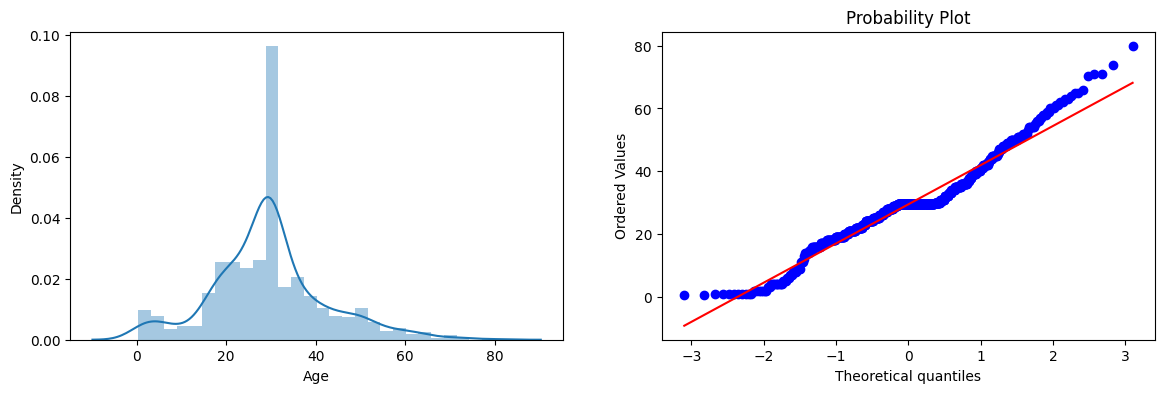

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])

plt.subplot(122)
stats.probplot(x_train['Age'], dist = 'norm', plot =plt)

plt.show()

/tmp/ipython-input-401592523.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


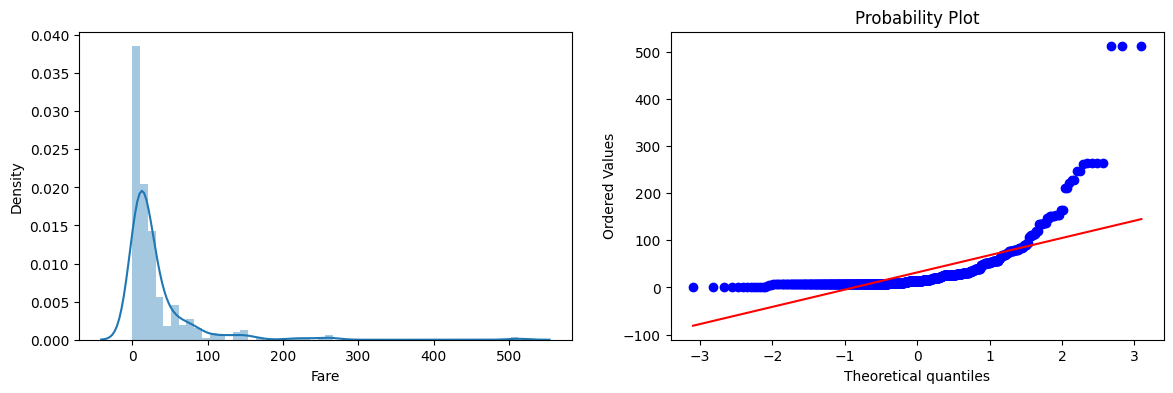

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])

plt.subplot(122)
stats.probplot(x_train['Fare'], dist = 'norm', plot =plt)

plt.show()

#### Accuracy without Feature Transformation

In [ ]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train, y_train)
clf1.fit(x_train,y_train)

ypred = clf.predict(x_test)
ypred1 = clf1.predict(x_test)

print(f'Accuracy LR', accuracy_score(y_test, ypred))
print(f'Accuracy DT', accuracy_score(y_test, ypred1))

Accuracy LR 0.659217877094972
Accuracy DT 0.659217877094972


#### Accuracy After Log Transformation